# Budget Analysis

---

## Environment Setup

In [1]:
# Initial Imports
import os
import plaid
import requests
import datetime
import json
import pandas as pd
from dotenv import load_dotenv

%matplotlib inline

In [2]:
# Helper functions

def pretty_print_response(response):
    """
    This function formats a JSON file to pretty printing it in the screen.
    """
    print(json.dumps(response, indent=4, sort_keys=True))

In [3]:
# Set environment variables from the .env file
load_dotenv()

True

In [4]:
# Extract API keys from environment variables
PLAID_CLIENT_ID = os.getenv("PLAID_CLIENT_ID")
PLAID_SECRET = os.getenv("PLAID_SECRET")
PLAID_PUBLIC_KEY = os.getenv("PLAID_PUBLIC_KEY")

---

## Plaid Access Token

In this section, you will use the `plaid-python` API to generate the correct authentication tokens to access data in the free developer Sandbox. This mimics how you might connect to your own account or a customer account, but due to privacy issues, this homework will only require connecting to and analyzing the fake data from the developer sandbox that Plaid provides. 

Complete the following steps to generate an access token:

1. Create a client to connect to plaid

2. Use the client to generate a public token and request the following items: ['transactions', 'income', 'assets']

3. Exchange the public token for an access token

4. Test the access token by requesting and printing the available test accounts

### 1. Create a client to connect to plaid

In [5]:
# Create the client object
client = plaid.Client(
client_id=PLAID_CLIENT_ID,
secret=PLAID_SECRET,
public_key=PLAID_PUBLIC_KEY,
environment="sandbox")

In [6]:
# Set the institution id
INSITUTION_ID = "ins_109508"

### 2. Generate a public token

In [7]:
# Create the public token
create_tkn_response = client.Sandbox.public_token.create(
INSITUTION_ID,
['transactions', 'income'])

# Print the public token
print(create_tkn_response["public_token"])

public-sandbox-f955cacf-b752-403e-b06d-3641485fa0f8


### 3. Exchange the public token for an access token

In [8]:
# Retrieve the access token
exchange_response = client.Item.public_token.exchange(create_tkn_response["public_token"])

# Print the access toke
print(exchange_response['access_token'])

access-sandbox-c972ff20-6507-4a07-b2f1-0d9e9cc1bcc2


In [9]:
# Store the access token in a Python variable
access_token = exchange_response['access_token']

### 4. Fetch Accounts

In [10]:
# Retrieve accounts
accounts = client.Accounts.get(access_token)
# Print accounts
print(json.dumps(accounts, indent=4))

{
    "accounts": [
        {
            "account_id": "BzDneZ37Vzu4pkbN4jQgSKgGAwXXbxSw5A9xE",
            "balances": {
                "available": 100,
                "current": 110,
                "iso_currency_code": "USD",
                "limit": null,
                "unofficial_currency_code": null
            },
            "mask": "0000",
            "name": "Plaid Checking",
            "official_name": "Plaid Gold Standard 0% Interest Checking",
            "subtype": "checking",
            "type": "depository"
        },
        {
            "account_id": "3eG7lb9m8eI8Llqe81ZViMkPAdllJBcqbM7Vx",
            "balances": {
                "available": 200,
                "current": 210,
                "iso_currency_code": "USD",
                "limit": null,
                "unofficial_currency_code": null
            },
            "mask": "1111",
            "name": "Plaid Saving",
            "official_name": "Plaid Silver Standard 0.1% Interest Saving",
       

---

# Account Transactions with Plaid

In this section, you will use the Plaid Python SDK to connect to the Developer Sandbox account and grab a list of transactions. You will need to complete the following steps:


1. Use the access token to fetch the transactions for the last 90 days

2. Print the categories for each transaction type

3. Create a new DataFrame using the following fields from the JSON transaction data: `date, name, amount, category`. (For categories with more than one label, just use the first category label in the list)

4. Convert the data types to the appropriate types (i.e. datetimeindex for the date and float for the amount)

### 1. Fetch the Transactions for the last 90 days

In [11]:
# Set the start and end date 90 days from today
start_date = "{:%Y-%m-%d}".format(datetime.datetime.now() + datetime.timedelta(-90))
end_date = "{:%Y-%m-%d}".format(datetime.datetime.now())

# Retrieve the transactions for the last 90 days
transaction_response = client.Transactions.get(access_token, start_date, end_date)
# Print the transactions
print(json.dumps(transaction_response['transactions'], indent=4))

[
    {
        "account_id": "dPDn4XmQyPiv1m9JvlpBcnByrallGxuZzD8nd",
        "account_owner": null,
        "amount": 500,
        "authorized_date": null,
        "category": [
            "Travel",
            "Airlines and Aviation Services"
        ],
        "category_id": "22001000",
        "date": "2020-06-29",
        "iso_currency_code": "USD",
        "location": {
            "address": null,
            "city": null,
            "country": null,
            "lat": null,
            "lon": null,
            "postal_code": null,
            "region": null,
            "store_number": null
        },
        "merchant_name": "United Airlines",
        "name": "United Airlines",
        "payment_channel": "in store",
        "payment_meta": {
            "by_order_of": null,
            "payee": null,
            "payer": null,
            "payment_method": null,
            "payment_processor": null,
            "ppd_id": null,
            "reason": null,
            "refer

### 2. Print the categories for each transaction

In [12]:
# Create a for-loop to print the categories for each transaction
for transaction in transaction_response['transactions']:
    print("current transaction type: {}".format(transaction["category"]))

current transaction type: ['Travel', 'Airlines and Aviation Services']
current transaction type: ['Travel', 'Taxi']
current transaction type: ['Food and Drink', 'Restaurants']
current transaction type: ['Payment']
current transaction type: ['Food and Drink', 'Restaurants', 'Fast Food']
current transaction type: ['Shops', 'Sporting Goods']
current transaction type: ['Payment', 'Credit Card']
current transaction type: ['Travel', 'Taxi']
current transaction type: ['Transfer', 'Debit']
current transaction type: ['Transfer', 'Deposit']
current transaction type: ['Recreation', 'Gyms and Fitness Centers']
current transaction type: ['Travel', 'Airlines and Aviation Services']
current transaction type: ['Food and Drink', 'Restaurants', 'Fast Food']
current transaction type: ['Food and Drink', 'Restaurants', 'Coffee Shop']
current transaction type: ['Food and Drink', 'Restaurants']
current transaction type: ['Transfer', 'Credit']
current transaction type: ['Travel', 'Airlines and Aviation Servic

### 3. Create a new DataFrame using the following fields from the JSON transaction data: `date`, `name`, `amount`, `category`. 

(For categories with more than one label, just use the first category label in the list)

In [13]:
# Define an empty DataFrame and set the columns as date, name, amount, and category
df = pd.DataFrame(columns=['date', 'name', 'amount', 'category'])
# Retrieve all the transactions and populate the transactions DataFrame with the transactions data
for transaction in transaction_response['transactions']:
    df = df.append({'date': transaction['date'], 'name': transaction['name'], 'amount': transaction['amount'], 'category': transaction['category'][0]}, ignore_index=True)

# Display sample data from the DataFrame    
df.head()

,date,name,amount,category
0,2020-06-29,United Airlines,500,Travel
1,2020-06-27,Uber 072515 SF**POOL**,6.33,Travel
2,2020-06-24,Tectra Inc,500,Food and Drink
3,2020-06-23,AUTOMATIC PAYMENT - THANK,2078.5,Payment
4,2020-06-23,KFC,500,Food and Drink


### 4. Convert the data types to the appropriate types 

(i.e. datetimeindex for the date and float for the amount)

In [14]:
# Display data types

# Here we display the data type of the first data stored in each columns in df
print(f"type for 'date' data: {type(df['date'].iat[0])}")
print(f"type for 'name' data: {type(df['name'].iat[0])}")
print(f"type for 'amount' data: {type(df['amount'].iat[0])}")
print(f"type for 'category' data: {type(df['category'].iat[0])}")

type for 'date' data: <class 'str'>
type for 'name' data: <class 'str'>
type for 'amount' data: <class 'int'>
type for 'category' data: <class 'str'>


In [15]:
# Make any required data type transformation

# Convert 'date' colunmn data from string to datetime64[ns] type
df['date'] = df['date'].apply(pd.to_datetime)

# Convert 'amount' column data from int to float
df = df.astype({'amount': float})

In [16]:
# Set the date column as index
df.set_index(df['date'], inplace=True)
# Drop column 'date'
df.drop(columns=['date'], inplace=True)
# Display sample data
df.head()

,name,amount,category
date,,,
2020-06-29,United Airlines,500.00,Travel
2020-06-27,Uber 072515 SF**POOL**,6.33,Travel
2020-06-24,Tectra Inc,500.00,Food and Drink
2020-06-23,AUTOMATIC PAYMENT - THANK,2078.50,Payment
2020-06-23,KFC,500.00,Food and Drink


---

# Income Analysis with Plaid

In this section, you will use the Plaid Sandbox to complete the following:

1. Determine the previous year's gross income and print the results

2. Determine the current monthly income and print the results

3. Determine the projected yearly income and print the results

In [17]:
# Fetch de income data
income_response = client.Income.get(access_token)
# Print the income data
print(json.dumps(income_response['income'], indent=4))

{
    "income_streams": [
        {
            "confidence": 0.99,
            "days": 690,
            "monthly_income": 500,
            "name": "UNITED AIRLINES"
        }
    ],
    "last_year_income": 6000,
    "last_year_income_before_tax": 7285,
    "max_number_of_overlapping_income_streams": 1,
    "number_of_income_streams": 1,
    "projected_yearly_income": 6085,
    "projected_yearly_income_before_tax": 7389
}


In [18]:
# Determine the previous year's gross income and print the results
# gross income refers to the total amount you earn before tax
print(income_response['income']['last_year_income_before_tax'])

7285


In [19]:
# Determine the current monthly income and print the results
print(income_response['income']['income_streams'][0]["monthly_income"])

500


In [20]:
# Determine the projected yearly income and print the results
print(income_response['income']['projected_yearly_income_before_tax'])

7389


---

# Budget Analysis
In this section, you will use the transactions DataFrame to analyze the customer's budget

1. Calculate the total spending per category and print the results (Hint: groupby or count transactions per category)

2. Generate a bar chart with the number of transactions for each category

3. Calulate the expenses per month

4. Plot the total expenses per month

### Calculate the expenses per category

In [21]:
# Compute the total expenses per category
# Here we create a sub-dataframe on columns "amount" and "category". We use groupby( ) and perform sum( ) on the 'amount' column
expenses = df[['amount','category']]
grouped_expenses = expenses.groupby(['category'])['amount'].sum()
# Display the expenses per catefory
print(f"expense for payment = {grouped_expenses['Payment']}")
print(f"expense for Food and Drink = {grouped_expenses['Food and Drink']}")
print(f"expense for Recreation = {grouped_expenses['Recreation']}")
print(f"expense for Shops = {grouped_expenses['Shops']}")
print(f"expense for Transfer = {grouped_expenses['Transfer']: .2f}")
print(f"expense for Travel = {grouped_expenses['Travel']: .2f}")

expense for payment = 6310.5
expense for Food and Drink = 3317.19
expense for Recreation = 235.5
expense for Shops = 1500.0
expense for Transfer =  20537.34
expense for Travel =  35.19


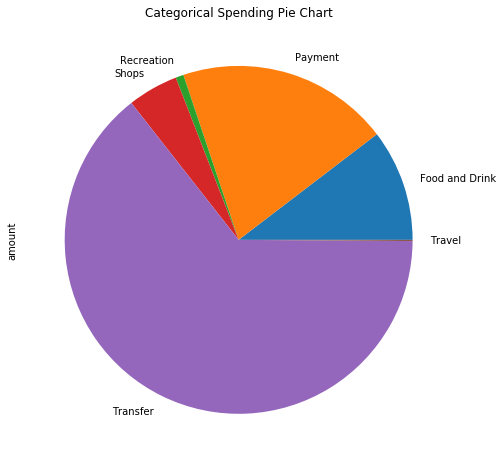

In [22]:
# Create a spending categories pie chart.
grouped_expenses.plot(kind='pie', figsize=(8,8), title="Categorical Spending Pie Chart")

### Calculate the expenses per month

In [23]:
# Create a DataFrame with the total expenses
total_expenses = expenses[['amount']].resample('M').sum()
# Set index to month 
total_expenses.index = total_expenses.index.month
# Display sample data
total_expenses

,amount
date,
4,10645.24
5,10645.24
6,10645.24


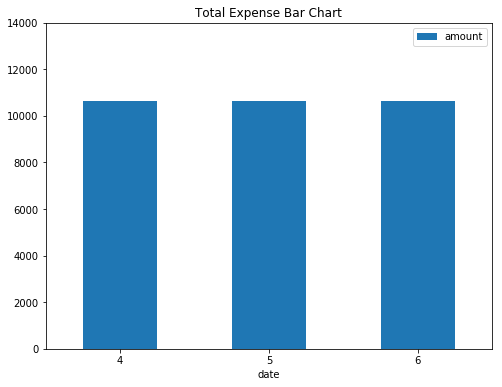

In [24]:
# Create a spending per month bar chart
total_expenses.plot(kind='bar', title='Total Expense Bar Chart', figsize=(8,6), ylim=[0,14000], rot=0)